<a href="https://colab.research.google.com/github/ArtyomHov/tensorflow-zero-to-mastery/blob/master/01_neural_network_regression_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks inTensorFlow
There are many definitions for regressions model but in our case, we are going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.13.0


### Creating a data to view and fit

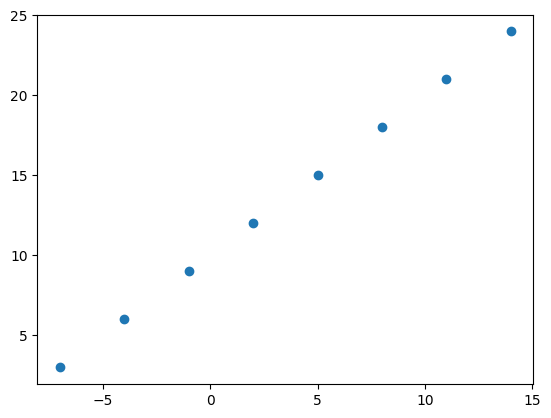

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [3]:
y == 10 + X

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
X[0].ndim

0

In [7]:
X[0], y[0]

(-7.0, 3.0)

In [8]:
# Turn our numpy arrays into tensors

X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

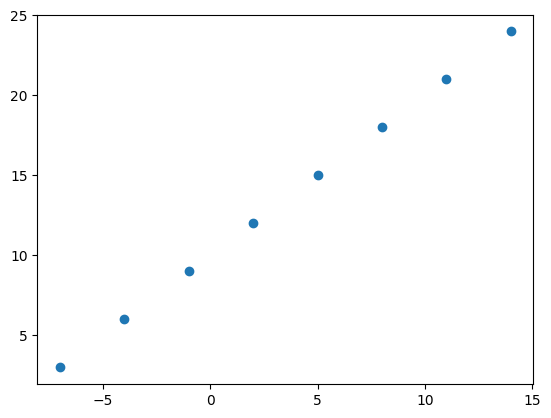

In [10]:
plt.scatter(X, y)

## Steps in modeling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells out model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels)

In [11]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics = ["mae"]
              )

# 3. Fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 0s 491ms/step - loss: 9.3155 - mae: 9.3155
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 9.1830 - mae: 9.1830
Epoch 3/5
1/1 [==============================] - 0s 15ms/step - loss: 9.0505 - mae: 9.0505
Epoch 4/5
1/1 [==============================] - 0s 17ms/step - loss: 8.9180 - mae: 8.9180
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 8.7855 - mae: 8.7855


In [12]:
# Check X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
# Try to make prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 88ms/step


array([[23.349684]], dtype=float32)

## Improving model

We can improve our model by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave for training longer) or on more data (give the model more examples to learn)

In [14]:
# Let'srebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis = -1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 333ms/step - loss: 14.6241 - mae: 14.6241
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 14.4916 - mae: 14.4916
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 14.3591 - mae: 14.3591
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 14.2266 - mae: 14.2266
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 14.0941 - mae: 14.0941
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 13.9616 - mae: 13.9616
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 13.8291 - mae: 13.8291
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 13.6966 - mae: 13.6966
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 13.5641 - mae: 13.5641
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 13.4316 - mae: 13.4316
Epoch 11/100
1/1 [==============================] -

In [15]:
# Remind ourselves of the data

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
# Let's see if our model's prediction has inproved

model.predict([17.0])

1/1 [==============================] - 0s 102ms/step


array([[29.34777]], dtype=float32)

In [17]:
# Let's see if we can make another change to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 15.8086 - mae: 15.8086
Epoch 2/100
1/1 [==============================] - 0s 23ms/step - loss: 14.7934 - mae: 14.7934
Epoch 3/100
1/1 [==============================] - 0s 27ms/step - loss: 14.0766 - mae: 14.0766
Epoch 4/100
1/1 [==============================] - 0s 28ms/step - loss: 13.3706 - mae: 13.3706
Epoch 5/100
1/1 [==============================] - 0s 50ms/step - loss: 12.6716 - mae: 12.6716
Epoch 6/100
1/1 [==============================] - 0s 25ms/step - loss: 11.9776 - mae: 11.9776
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 11.2871 - mae: 11.2871
Epoch 8/100
1/1 [==============================] - 0s 22ms/step - loss: 10.5983 - mae: 10.5983
Epoch 9/100
1/1 [==============================] - 0s 20ms/step - loss: 9.9093 - mae: 9.9093
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 9.2178 - mae: 9.2178
Epoch 11/100
1/1 [==============================] - 0s 

In [18]:
# Let's remind ourselves about the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
# Let's try to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 120ms/step


array([[26.06837]], dtype=float32)

## Evaluating a model
In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> Fit it -> evaluate it -> tweak a model ->  -> Fit it -> evaluate it -> tweak a model -> Fit it -> evaluate it -> tweak a model
```

When it comes to evaluation... there are 3 words you should memorise
> "Visualize, Visualize, Visualize"

It's good idea to visualize:

* The data - what data we are working with? What does it look like?
* The model itself - what does a model look like?
* The training of model - how does a model perform while it learns?
* The predictions of the model - how do the the predictions of a model line up against the ground truth (the original labels)?


In [20]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [21]:
# Make labels for dataset

y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

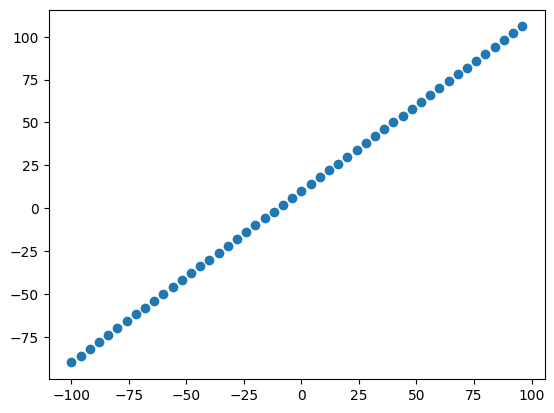

In [22]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)


### The 3 sets...

**Training set** - the model learns from this data, which is typically 70-80% of the total data you have available

**Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available

**Test set** - the model gets evaluated on this data to test what it has learned, which is typically 10-15% of the data available.


In [23]:
# Check the length of how many samples we have

len(X)

50

In [24]:
# Split the data into train and test sets

X_train = X[:40] # first 40 are training samples
y_train = y[:40]

X_test = X[40:] # last 10 are test samples
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again!

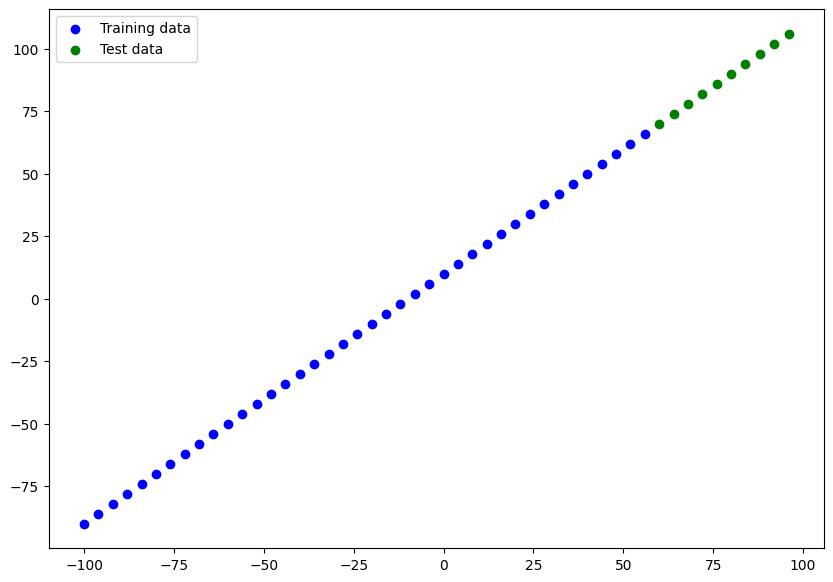

In [25]:
plt.figure(figsize = (10, 7))

# Plot training data in blue

plt.scatter(X_train, y_train, c = 'b', label = 'Training data')

# Plot test data in green

plt.scatter(X_test, y_test, c = 'g', label = 'Test data')

# Show legend

plt.legend()

In [26]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
#model.fit(X_train, y_train, epochs=100)

### Visualizing the model

In [28]:
model.summary()

ValueError: ignored

In [29]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer

tf.random.set_seed(42)

# Create a model (same as above)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, name='output_layer')
], name='model_1')

# Compile a model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [30]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**)

📖**Resource:** For a more in depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning.

⚓**Exercise** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters total and trainable by calling model.summary()

In [31]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [32]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


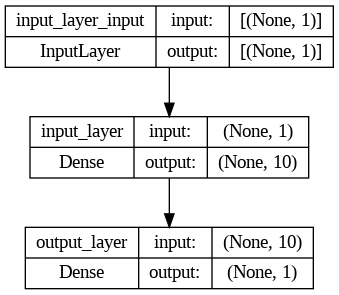

In [33]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions
To visualize predictions it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model predictions)

In [34]:
# Make some predictions

y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 111ms/step


array([[ 70.4914  ],
       [ 75.07661 ],
       [ 79.66182 ],
       [ 84.24703 ],
       [ 88.832245],
       [ 93.41745 ],
       [ 98.00267 ],
       [102.587875],
       [107.17309 ],
       [111.7583  ]], dtype=float32)

**Note** If you feel like you are going to use some functionality in the future it's a good idea to turn it into a function

In [35]:
# Let's create a plotting function
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c = "b", label = "Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot models predictions in red
  plt.scatter(test_data, predictions, c = "r", label = "Predictions")
  plt.legend()

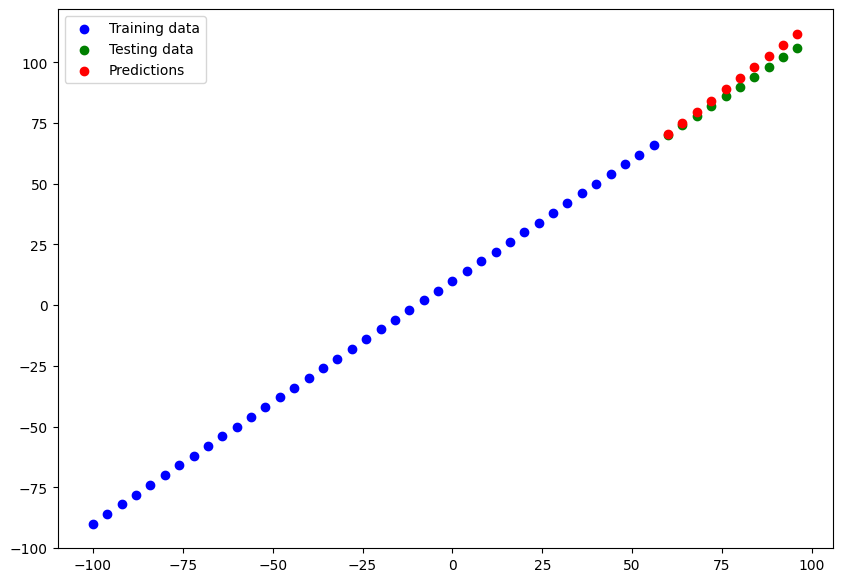

In [36]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics.
Depending on the problem you are working on, there will be different evaluation metric to evaluate your model's performance.

Since we are working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average", how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [37]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 239ms/step - loss: 3.1248 - mae: 3.1248


[3.1248481273651123, 3.1248481273651123]

In [38]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.606878, 14.154036, 11.735272, 10.350594, 10.      , 10.68349 ,
       12.401602, 15.2703  , 19.173088, 23.7583  ], dtype=float32)>

In [39]:
y_pred

array([[ 70.4914  ],
       [ 75.07661 ],
       [ 79.66182 ],
       [ 84.24703 ],
       [ 88.832245],
       [ 93.41745 ],
       [ 98.00267 ],
       [102.587875],
       [107.17309 ],
       [111.7583  ]], dtype=float32)

In [40]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [41]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.4914  ,  75.07661 ,  79.66182 ,  84.24703 ,  88.832245,
        93.41745 ,  98.00267 , 102.587875, 107.17309 , 111.7583  ],
      dtype=float32)>

In [42]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1248488>

In [43]:
# Calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_true = y_test,
                                     y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=12.590077>

In [44]:
# Make some functions to reause MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_true,
                                        y_pred = tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_true,
                                       y_pred = tf.squeeze(y_pred))

### Running experiments to i mprove our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```
1. Get more data - get more examples for you model to train on (more opportunities to learn patterns or relationships between features and labels)
2. Make your model larger (using more complex model) - this might come in the form of more layers or more hidden units in eaxh layer.
3. Train for longer - give your model more of a chance to find a patterns in the data

Lets do 3 modelling experiments.

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

**Build** `model_1`

In [45]:
# Set random seed
tf.random.set_seed(42)
# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 20ms/step - loss: 57.7694 - mae: 57.7694
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 23.2973 - mae: 23.2973
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 10.5120 - mae: 10.5120
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 13.0065 - mae: 13.0065
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 12.0561 - mae: 12.0561
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.3297 - mae: 9.3297
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.4881 - mae: 8.4881
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 9.0502 - mae: 9.0502
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 18.5204 - mae: 18.5204
Epoch 10/100
2/2 [==============================] - 0s 16ms/step - loss: 9.9952 - mae: 9.9952
Epoch 11/100
2/2 [==============================] - 0s 12ms/step

1/1 [==============================] - 0s 83ms/step


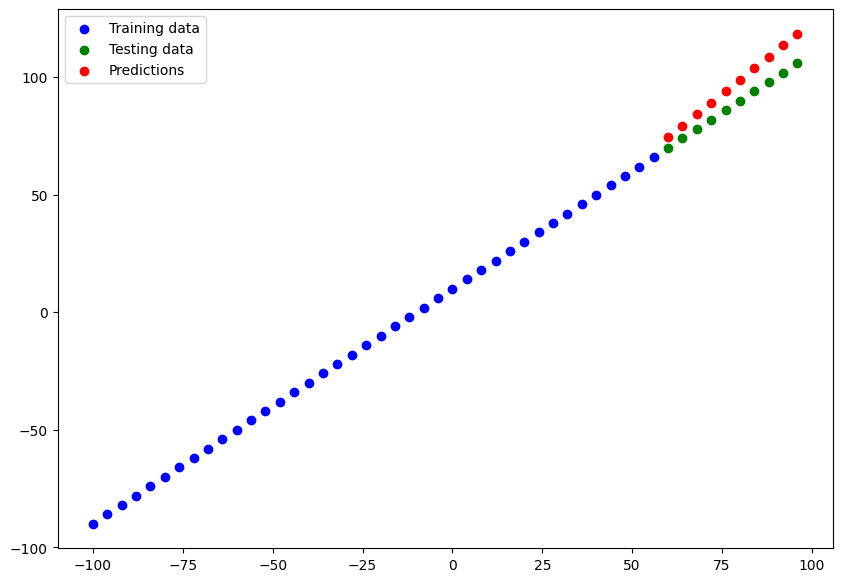

In [46]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [47]:
tf.constant(y_preds_1), tf.squeeze(y_preds_1)

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[ 74.52825],
        [ 79.4113 ],
        [ 84.29435],
        [ 89.1774 ],
        [ 94.06045],
        [ 98.9435 ],
        [103.82655],
        [108.7096 ],
        [113.59265],
        [118.4757 ]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 74.52825,  79.4113 ,  84.29435,  89.1774 ,  94.06045,  98.9435 ,
        103.82655, 108.7096 , 113.59265, 118.4757 ], dtype=float32)>)

In [48]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.501975>,
 <tf.Tensor: shape=(), dtype=float32, numpy=78.71675>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [49]:
# Set random seed
tf.random.set_seed(42)

# 2. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss = tf.keras.losses.mae,
            optimizer = tf.keras.optimizers.SGD(),
            metrics = ['mse'])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 22ms/step - loss: 55.9189 - mse: 4955.2842
Epoch 2/100
2/2 [==============================] - 0s 14ms/step - loss: 12.0542 - mse: 207.0120
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 32.9811 - mse: 1606.9548
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 15.2186 - mse: 311.2467
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 18.7378 - mse: 476.7646
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.4114 - mse: 129.0636
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 10.4540 - mse: 143.0633
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 12.1388 - mse: 202.2617
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 38.1646 - mse: 2250.6614
Epoch 10/100
2/2 [==============================] - 0s 14ms/step - loss: 25.7275 - mse: 929.7765
Epoch 11/100
2/2 [========================

1/1 [==============================] - 0s 102ms/step


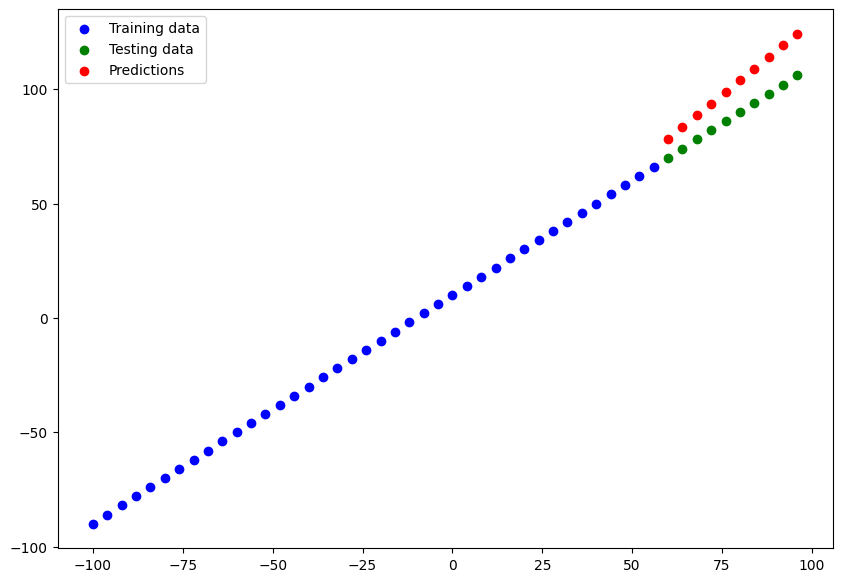

In [50]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [51]:
# Calculate model_2 evaluation matrix

mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=13.238078>,
 <tf.Tensor: shape=(), dtype=float32, numpy=185.23671>)

**Build** ``model_3``

* 2 layers trained for 500 epochs

In [52]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 1s 15ms/step - loss: 30.2809 - mae: 30.2809
Epoch 2/500
2/2 [==============================] - 0s 9ms/step - loss: 26.2384 - mae: 26.2384
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 31.9907 - mae: 31.9907
Epoch 4/500
2/2 [==============================] - 0s 9ms/step - loss: 24.7937 - mae: 24.7937
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 14.6895 - mae: 14.6895
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 11.6956 - mae: 11.6956
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 11.0391 - mae: 11.0391
Epoch 8/500
2/2 [==============================] - 0s 12ms/step - loss: 11.0422 - mae: 11.0422
Epoch 9/500
2/2 [==============================] - 0s 10ms/step - loss: 39.8559 - mae: 39.8559
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 27.3285 - mae: 27.3285
Epoch 11/500
2/2 [==============================] - 0s 7

1/1 [==============================] - 0s 96ms/step


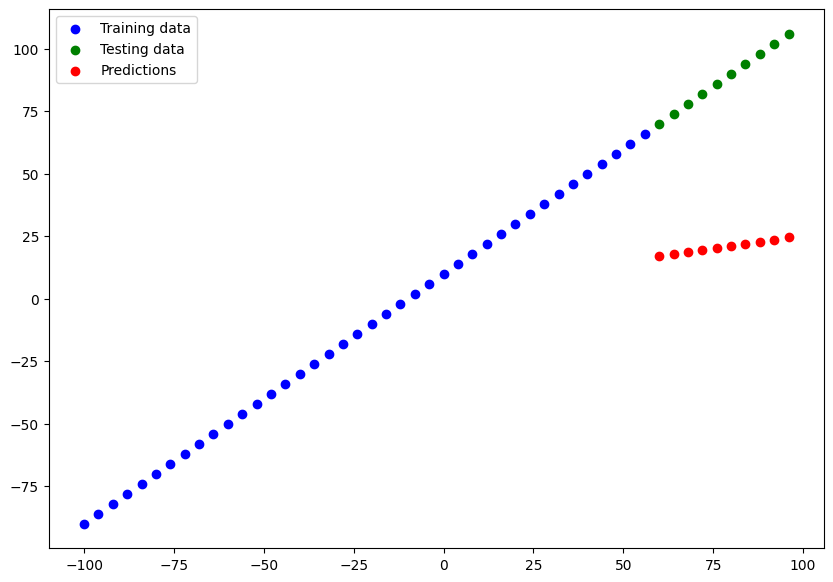

In [53]:
# Make and plot some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions = y_preds_3)

In [54]:
# Calculate model_3 evaluation matrix
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.230415>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4602.606>)

**Note** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

### Comparing the results of our experments
We've run some experiments, let's compare the results

In [55]:
# Let's compare our model's results using Panda's dataframe
import pandas as pd

model_results = [['model_1', mae_1.numpy(), mse_1.numpy()],
                 ['model_2', mae_2.numpy(), mse_2.numpy()],
                 ['model_3', mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns = ['model', 'mae', 'mse'])
all_results

,model,mae,mse
0,model_1,8.501975,78.716751
1,model_2,13.238078,185.236710
2,model_3,67.230415,4602.605957


## Looks like `model_2` performed the best

In [56]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do the more thing you'll figure out which don't work. Remember the machine learning practitioner's motto: "experiment, experiment, experiment.

## Tracking you experiments

One really good habbit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedios if you running lots of expermients.

Luckily, there are tools to help us!

**Resource:** As you build more models, you'll want to look into using:

* Tensorboard - a component of the Tensorflow library to help track modelling experiments (we'll see this one later).
* Weghts & Biases - a tool for tracking all of kinds of machine learning experiments (plugs straight into Tensorboard).

### Saving our models
Saving models allows us to use them outside of Google Colab (or whereever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format

In [57]:
# Save a model using Tthe SavedModel format
model_2.save("model_2_SavedModel_format")

In [58]:
# Save the model using HDF5 format.
model_2.save("model_2_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Loading in a saved model.

In [59]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/model_2_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
# Compare model_2 predictions with loaded_SavedModel_format predictions.
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 53ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [61]:
# Loading a model using .h5 format
loaded_h5_model = tf.keras.models.load_model('/content/model_2_HDF5_format.h5')
loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
# Compare the MAE of model_2 preds and loaded_SavedModel preds.
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [63]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 47ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

1. You can go to "files" and right click on the file you are after and click "download"
2. Use code (see the cell below)
3. Save it to google drive by connecting google drive and copying it there.

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [65]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/model_2_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [66]:
# Save it from Google Colab to Google Drive (this requires mounting Google Drive)
!cp /content/model_2_HDF5_format.h5 /content/drive/MyDrive/model_2_HDF5_format.h5

## A larger example

In [67]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [68]:
# Read the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [69]:
# Let's try one-hot encode our dataframe so it's all numbers.
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [72]:
# Create X and y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot['charges']

In [73]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [74]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [75]:

# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [77]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed = 42

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

# 3. fit the model
insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 8741.9521 - mae: 8741.9521
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7875.5635 - mae: 7875.5635
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7610.0532 - mae: 7610.0532
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7692.4253 - mae: 7692.4253
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7646.7554 - mae: 7646.7554
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7650.1611 - mae: 7650.1611
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7545.0166 - mae: 7545.0166
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7735.7529 - mae: 7735.7529
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7546.6221 - mae: 7546.6221
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7706.3506 - mae: 7706.3506

In [78]:
# check the results of the insurance_model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7284.1050 - mae: 7284.1050


[7284.10498046875, 7284.10498046875]

In [81]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

#### Right now it looks like our model isn't performing too well... let's try and improve it.

To try to improve our model, we'll run 2 experiments
1. Add an extra layers with more hidden units and use Adam optimizer
2. Same as above but train for longer (200 epochs)
3. Insert your experiments here

In [88]:
# Set random seed
tf.random.set_seed = 42

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

#3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 3s 5ms/step - loss: 13287.3467 - mae: 13287.3467
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13116.6963 - mae: 13116.6963
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12758.3408 - mae: 12758.3408
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12057.3955 - mae: 12057.3955
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 10894.9111 - mae: 10894.9111
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 9428.3154 - mae: 9428.3154
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 8111.7637 - mae: 8111.7637
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7505.0674 - mae: 7505.0674
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7412.9341 - mae: 7412.9341
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7393.5015 - mae:

In [89]:
# Evalute the larger model
insurance_model_2.evaluate(X_test, y_test, )

9/9 [==============================] - 0s 3ms/step - loss: 4884.7622 - mae: 4884.7622


[4884.76220703125, 4884.76220703125]

In [90]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7284.1050 - mae: 7284.1050


[7284.10498046875, 7284.10498046875]

In [92]:
# Set random seed
tf.random.set_seed = 42

# 1. Create the model same as above
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13298.5068 - mae: 13298.5068
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13154.4678 - mae: 13154.4678
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12843.3027 - mae: 12843.3027
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12215.5957 - mae: 12215.5957
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 11134.9424 - mae: 11134.9424
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9689.4102 - mae: 9689.4102
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8299.8369 - mae: 8299.8369
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7567.7515 - mae: 7567.7515
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7430.0938 - mae: 7430.0938
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7408.8696 - mae:

In [93]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3497.4712 - mae: 3497.4712


[3497.47119140625, 3497.47119140625]

In [94]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7284.1050 - mae: 7284.1050


[7284.10498046875, 7284.10498046875]

Text(0.5, 0, 'epochs')

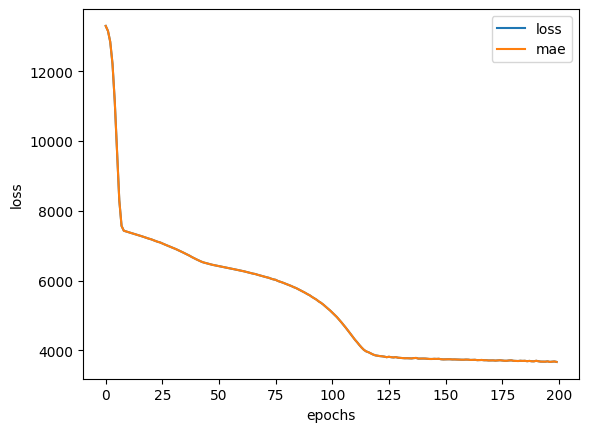

In [96]:
# Plot history (also known as a loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

**Question** How long should you train for?

It depends on the problems you are working on. However, many people have asked this question before... so TensorFlow has a solution. It's called the EarlyStopping Callback, which is TensorFlow component you can add to your model to stop training once its stops improving certain metrics.

## Preprocessing data (normalization and standardization)